# WiCHORD+ Simulator Implementation in Python
Created by Christos-Panagiotis Balatsouras
ORCID: https://orcid.org/0000-0001-8914-7559

## Use Case: Chord-Based Routing Evaluation on Wireless Sensor Networks

Simulation Experiments:
1. Key (Node IDs) Storage Efficiency per node & Load Balancing
2. Energy Efficiency
3. MAC Address Hashing for Node ID Assignment Collision Rate

In [1]:
# Import Python Modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import secrets
import random
import pandas as pd

In [2]:
# Import modules from this project
from globals import hash_space_bits
from network_build import network_build
from SensorNode import SensorNode
from Query import Query

In [3]:
# Global Variables
# ...

### Function Definitions

In [4]:
def create_random_wsn(num_of_nodes):
    """
    Function to create random WSNs with nodes of random generated mac addresses
    :param num_of_nodes: the desired total num of nodes on the WSN
    :return: the created and built WSN instance with the initial nodes joined
    """
    # Create random sensor node mac addresses to add to the network
    nodes_list = []
    for n in range(0, num_of_nodes):
        mac_addr = secrets.token_hex(6)  # Generate random MAC addresses
        nodes_list.append(SensorNode(mac_addr, None))  # add random node to list
    # Sort the list of nodes by NODE ID
    nodes_list.sort(key=lambda node: node.node_id)
    
    # Add the above random sensor nodes to a new empty network
    sensornet = network_build(nodes_list)
    
    return sensornet

### Main Application

In [5]:
print("+-----------------------------------+")
print("|                                   |")
print("|        Wi-CHORD+ Simulator        |")
print("|                                   |")
print("+-----------------------------------+")
print("Chord Protocol Application on Wireless Sensor Networks")
print("Implementation by Christos-Panagiotis Mpalatsouras")
print("ORCID: orcid.org/0000-0001-8914-7559")

+-----------------------------------+
|                                   |
|        Wi-CHORD+ Simulator        |
|                                   |
+-----------------------------------+
Chord Protocol Application on Wireless Sensor Networks
Implementation by Christos-Panagiotis Mpalatsouras
ORCID: orcid.org/0000-0001-8914-7559


#### Simulation #1: Key Load Balancing

In [6]:
print("\nExperiment: Measuring the Average NodeID Storage per total number of Nodes\n")


Experiment: Measuring the Average NodeID Storage per total number of Nodes


In [7]:
minimum_nodes = int(input("Please Specify the minimum num of nodes on the network: "))
print("Minimum nodes on a sensor network: ", minimum_nodes)
maximum_nodes = int(input("Please Specify the maximum num of nodes on the network: "))
print("Maximum nodes on a sensor network: ", maximum_nodes)
step = int(input("Please specify the total nodes increment step: "))
print("Increment step: ", step)

Minimum nodes on a sensor network:  10
Maximum nodes on a sensor network:  1010
Increment step:  10


In [8]:
# Main Simulation for Storage Efficiency
results = []  # list to store the results
for total_nodes in range(minimum_nodes, maximum_nodes, step):
    print("\nRunning Experiment with total nodes: ", total_nodes)
    
    # Create a random WSN with random sensor node MAC Addresses
    wsn = create_random_wsn(total_nodes)
    
    # Export the network's list of nodes
    list_of_nodes = wsn.List_of_Nodes
    
    # ---- Find the average number of node IDs stored in the memory of each node ----
    sum_of_contacts = 0  # the total sum of node contacts
    for node in list_of_nodes:
        node.update_total_num_of_contacts()
        sum_of_contacts = sum_of_contacts + node.contacts_num  # update the total sum of node contacts
    
    local_average = sum_of_contacts / total_nodes
    local_result = {
        "Nodes": total_nodes, 
        "Avg_Num_of_Contacts": local_average
    }
    results.append(local_result)


Running Experiment with total nodes:  10

Running Experiment with total nodes:  20

Running Experiment with total nodes:  30

Running Experiment with total nodes:  40

Running Experiment with total nodes:  50

Running Experiment with total nodes:  60

Running Experiment with total nodes:  70

Running Experiment with total nodes:  80

Running Experiment with total nodes:  90

Running Experiment with total nodes:  100

Running Experiment with total nodes:  110

Running Experiment with total nodes:  120

Running Experiment with total nodes:  130

Running Experiment with total nodes:  140

Running Experiment with total nodes:  150

Running Experiment with total nodes:  160

Running Experiment with total nodes:  170

Running Experiment with total nodes:  180

Running Experiment with total nodes:  190

Running Experiment with total nodes:  200

Running Experiment with total nodes:  210

Running Experiment with total nodes:  220

Running Experiment with total nodes:  230

Running Experiment 

In [9]:
results

[{'Nodes': 10, 'Avg_Num_of_Contacts': 3.9},
 {'Nodes': 20, 'Avg_Num_of_Contacts': 5.25},
 {'Nodes': 30, 'Avg_Num_of_Contacts': 5.633333333333334},
 {'Nodes': 40, 'Avg_Num_of_Contacts': 6.075},
 {'Nodes': 50, 'Avg_Num_of_Contacts': 6.1},
 {'Nodes': 60, 'Avg_Num_of_Contacts': 6.666666666666667},
 {'Nodes': 70, 'Avg_Num_of_Contacts': 6.771428571428571},
 {'Nodes': 80, 'Avg_Num_of_Contacts': 7.1125},
 {'Nodes': 90, 'Avg_Num_of_Contacts': 7.122222222222222},
 {'Nodes': 100, 'Avg_Num_of_Contacts': 7.39},
 {'Nodes': 110, 'Avg_Num_of_Contacts': 7.545454545454546},
 {'Nodes': 120, 'Avg_Num_of_Contacts': 7.691666666666666},
 {'Nodes': 130, 'Avg_Num_of_Contacts': 7.6461538461538465},
 {'Nodes': 140, 'Avg_Num_of_Contacts': 7.864285714285714},
 {'Nodes': 150, 'Avg_Num_of_Contacts': 7.966666666666667},
 {'Nodes': 160, 'Avg_Num_of_Contacts': 8.125},
 {'Nodes': 170, 'Avg_Num_of_Contacts': 8.194117647058823},
 {'Nodes': 180, 'Avg_Num_of_Contacts': 8.21111111111111},
 {'Nodes': 190, 'Avg_Num_of_Contacts

In [10]:
# Convert results array of dicts to Pandas DataFrame
results_df = pd.DataFrame(results)
results_df

,Nodes,Avg_Num_of_Contacts
0,10,3.900000
1,20,5.250000
2,30,5.633333
3,40,6.075000
4,50,6.100000
...,...,...
95,960,10.757292
96,970,10.819588
97,980,10.753061
98,990,10.750505


In [11]:
# Plot the simulation experiment results
# Set the appearance parameters for the plots
mpl.rcParams['figure.figsize'] = [30, 15]
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 30
mpl.rcParams['axes.labelsize'] = 25

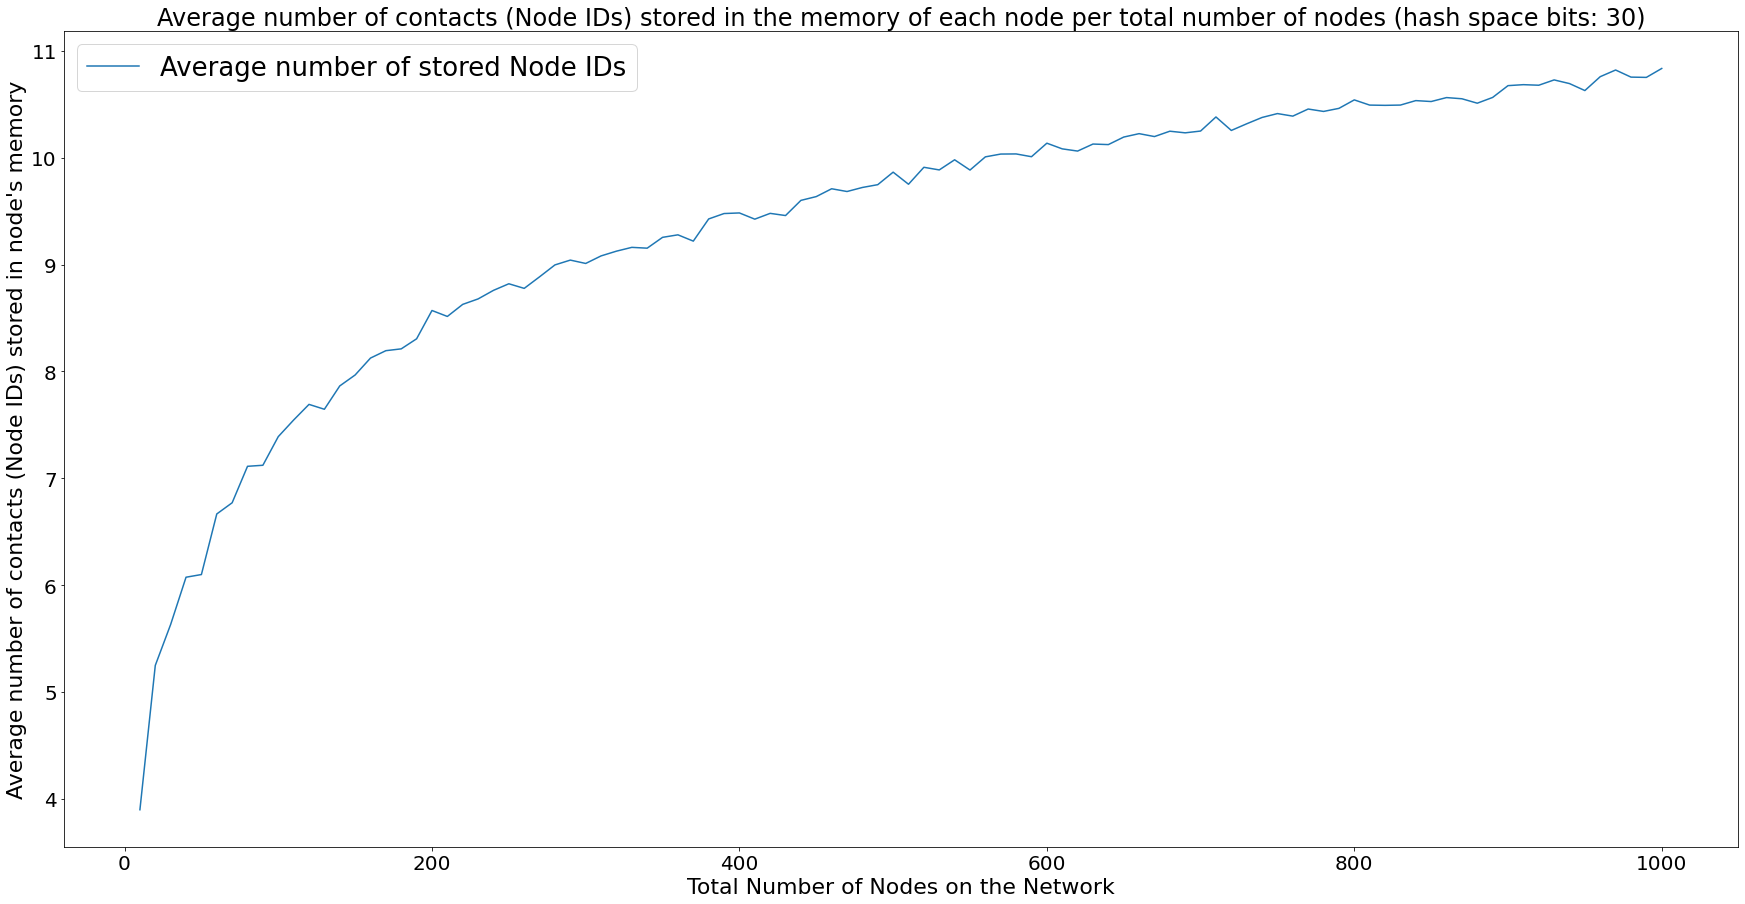

In [12]:
# Show the plot/plots
plt.plot(
    results_df["Nodes"], 
    results_df["Avg_Num_of_Contacts"], 
    label="Average number of stored Node IDs"
)
plt.ylabel("Average number of contacts (Node IDs) stored in node's memory", fontsize=22)
plt.xlabel("Total Number of Nodes on the Network", fontsize=22)
plt.title("Average number of contacts (Node IDs) stored in the memory of each node per total number of nodes (hash space bits: "+str(hash_space_bits)+")", fontsize=24)
plt.legend(prop={'size': 26})
plt.show()

#### Simulation #2: Energy Efficiency and total energy consumption (Node Join Operation)

In [13]:
print("\nExperiment: Measuring the number of nodes involved for a node join query\n")


Experiment: Measuring the number of nodes involved for a node join query


In [15]:
total_runs_per_experiment = int(input("Please Specify the total runs per experiment: "))
print("Total runs per experiment: ", total_runs_per_experiment)
minimum_nodes = int(input("Please Specify the minimum num of nodes on the network: "))
print("Minimum nodes on a sensor network: ", minimum_nodes)
maximum_nodes = int(input("Please Specify the maximum num of nodes on the network: "))
print("Maximum nodes on a sensor network: ", maximum_nodes)
step = int(input("Please specify the total nodes increment step: "))
print("Increment step: ", step)

Total runs per experiment:  10
Minimum nodes on a sensor network:  10
Maximum nodes on a sensor network:  310
Increment step:  10


In [16]:
# Main Simulation for Join Operation Energy Efficiency
results = []  # list to store the results
for total_nodes in range(minimum_nodes, maximum_nodes, step):
    print("\nRunning Experiment with total nodes: ", total_nodes)
    
    # Perform the simulation experiment
    sum_of_involved_nodes = 0  # the sum of nodes involved for a query to be resolved
    for i in range(0, total_runs_per_experiment):
        wsn = create_random_wsn(total_nodes) # Create a random WSN with random sensor node MAC Addresses
        list_of_nodes = wsn.List_of_Nodes # Export the network's list of nodes
        # Create a new random node to add to the network
        mac_addr = secrets.token_hex(6)  # Generate random MAC addresses
        new_node = SensorNode(mac_addr, None)  # random node instance
        q = Query("join")  # query instance
        new_node.node_join(wsn, query_id=q)  # perform the query
        sum_of_involved_nodes = sum_of_involved_nodes + q.nodes_involved  # update the sum of involved nodes for the query to be resolved
        
        
    # Calculate the local average result
    local_average = sum_of_involved_nodes / total_runs_per_experiment
    local_result = {
        "Nodes": total_nodes, 
        "Avg_Num_of_Involved_Nodes": local_average
    }
    results.append(local_result)


Running Experiment with total nodes:  10

Running Experiment with total nodes:  20

Running Experiment with total nodes:  30

Running Experiment with total nodes:  40

Running Experiment with total nodes:  50

Running Experiment with total nodes:  60

Running Experiment with total nodes:  70

Running Experiment with total nodes:  80

Running Experiment with total nodes:  90

Running Experiment with total nodes:  100

Running Experiment with total nodes:  110

Running Experiment with total nodes:  120

Running Experiment with total nodes:  130

Running Experiment with total nodes:  140

Running Experiment with total nodes:  150

Running Experiment with total nodes:  160

Running Experiment with total nodes:  170

Running Experiment with total nodes:  180

Running Experiment with total nodes:  190

Running Experiment with total nodes:  200

Running Experiment with total nodes:  210

Running Experiment with total nodes:  220

Running Experiment with total nodes:  230

Running Experiment 

In [17]:
results

[{'Nodes': 10, 'Avg_Num_of_Involved_Nodes': 1.9},
 {'Nodes': 20, 'Avg_Num_of_Involved_Nodes': 3.8},
 {'Nodes': 30, 'Avg_Num_of_Involved_Nodes': 5.4},
 {'Nodes': 40, 'Avg_Num_of_Involved_Nodes': 4.4},
 {'Nodes': 50, 'Avg_Num_of_Involved_Nodes': 5.1},
 {'Nodes': 60, 'Avg_Num_of_Involved_Nodes': 4.4},
 {'Nodes': 70, 'Avg_Num_of_Involved_Nodes': 5.4},
 {'Nodes': 80, 'Avg_Num_of_Involved_Nodes': 7.5},
 {'Nodes': 90, 'Avg_Num_of_Involved_Nodes': 4.6},
 {'Nodes': 100, 'Avg_Num_of_Involved_Nodes': 4.8},
 {'Nodes': 110, 'Avg_Num_of_Involved_Nodes': 5.8},
 {'Nodes': 120, 'Avg_Num_of_Involved_Nodes': 9.1},
 {'Nodes': 130, 'Avg_Num_of_Involved_Nodes': 4.9},
 {'Nodes': 140, 'Avg_Num_of_Involved_Nodes': 6.4},
 {'Nodes': 150, 'Avg_Num_of_Involved_Nodes': 8.1},
 {'Nodes': 160, 'Avg_Num_of_Involved_Nodes': 7.2},
 {'Nodes': 170, 'Avg_Num_of_Involved_Nodes': 6.0},
 {'Nodes': 180, 'Avg_Num_of_Involved_Nodes': 6.4},
 {'Nodes': 190, 'Avg_Num_of_Involved_Nodes': 7.2},
 {'Nodes': 200, 'Avg_Num_of_Involved_Nod

In [18]:
# Convert results array of dicts to Pandas DataFrame
results_df = pd.DataFrame(results)
results_df

,Nodes,Avg_Num_of_Involved_Nodes
0,10,1.9
1,20,3.8
2,30,5.4
3,40,4.4
4,50,5.1
5,60,4.4
6,70,5.4
7,80,7.5
8,90,4.6
9,100,4.8


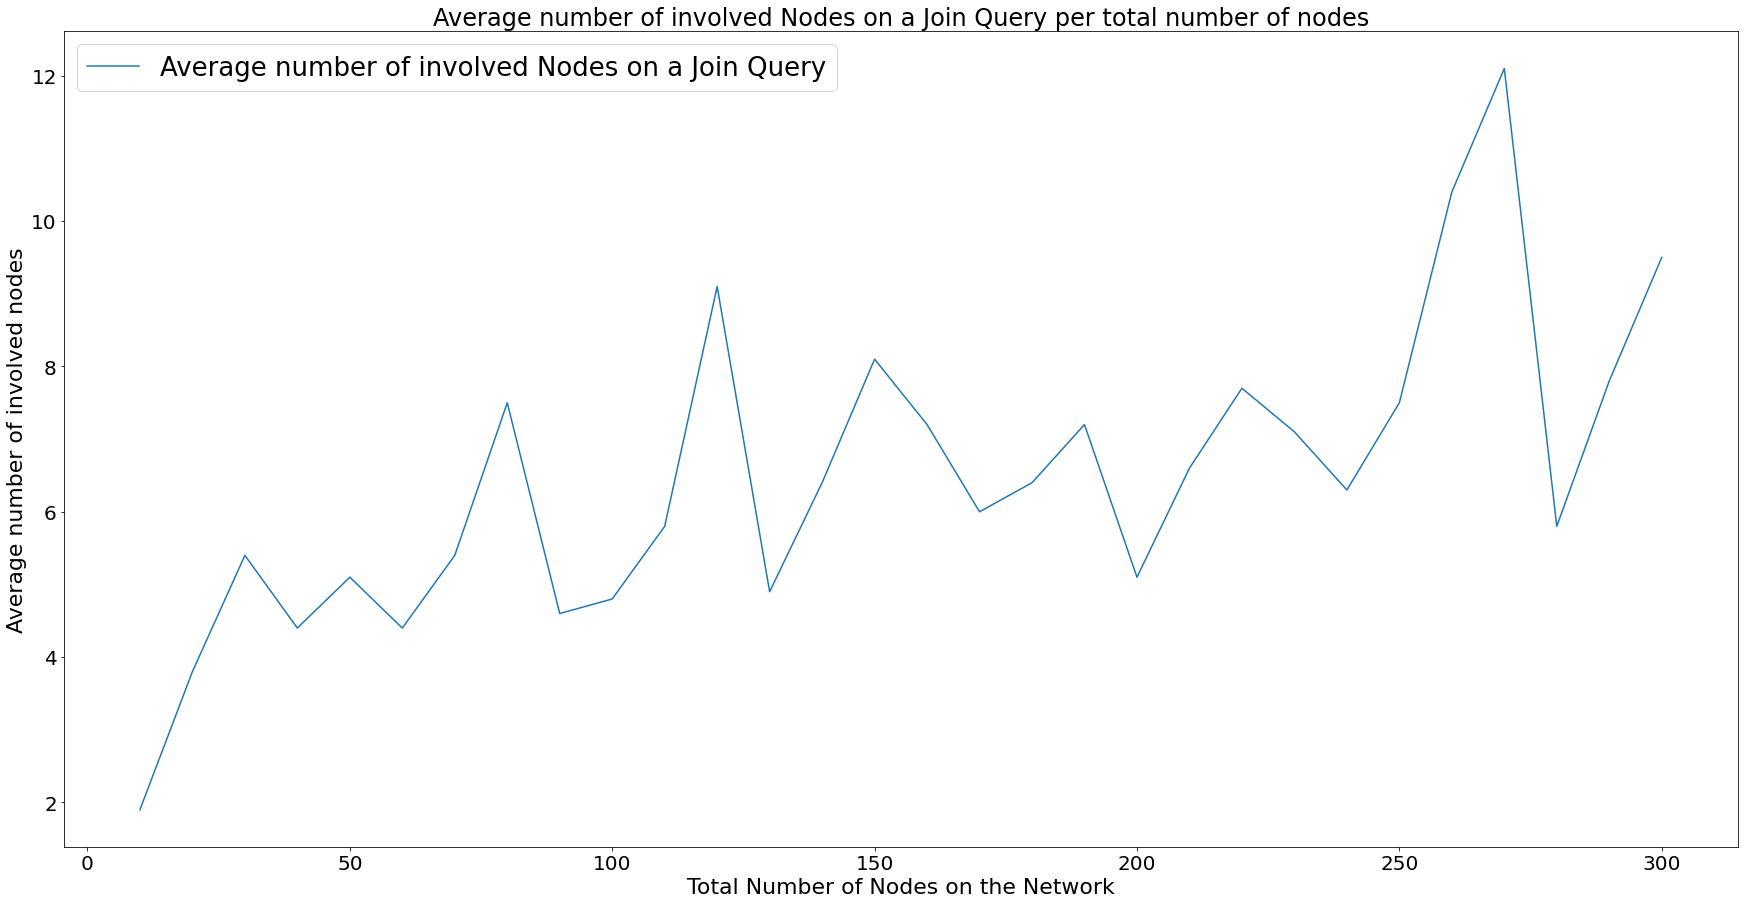

In [19]:
# Show the plot/plots
plt.plot(
    results_df["Nodes"], 
    results_df["Avg_Num_of_Involved_Nodes"], 
    label="Average number of involved Nodes on a Join Query"
)
plt.ylabel("Average number of involved nodes", fontsize=22)
plt.xlabel("Total Number of Nodes on the Network", fontsize=22)
plt.title("Average number of involved Nodes on a Join Query per total number of nodes", fontsize=24)
plt.legend(prop={'size': 26})
plt.show()

#### Simulation #3: Energy Efficiency and total energy consumption (Node Leave Operation)

In [20]:
print("\nExperiment: Measuring the number of nodes involved for a node leave query\n")


Experiment: Measuring the number of nodes involved for a node leave query


In [21]:
total_runs_per_experiment = int(input("Please Specify the total runs per experiment: "))
print("Total runs per experiment: ", total_runs_per_experiment)
minimum_nodes = int(input("Please Specify the minimum num of nodes on the network: "))
print("Minimum nodes on a sensor network: ", minimum_nodes)
maximum_nodes = int(input("Please Specify the maximum num of nodes on the network: "))
print("Maximum nodes on a sensor network: ", maximum_nodes)
step = int(input("Please specify the total nodes increment step: "))
print("Increment step: ", step)

Total runs per experiment:  10
Minimum nodes on a sensor network:  10
Maximum nodes on a sensor network:  310
Increment step:  10


In [22]:
# Main Simulation for Leave Operation Energy Efficiency
results = []  # list to store the results
for total_nodes in range(minimum_nodes, maximum_nodes, step):
    print("\nRunning Experiment with total nodes: ", total_nodes)
    
    # Perform the simulation experiment
    sum_of_involved_nodes = 0  # the sum of nodes involved for a query to be resolved
    for i in range(0, total_runs_per_experiment):
        wsn = create_random_wsn(total_nodes) # Create a random WSN with random sensor node MAC Addresses
        list_of_nodes = wsn.List_of_Nodes # Export the network's list of nodes
        active_node = random.choice(list_of_nodes) # Pick a random node to sign-in and then perform the simulation experiment
        q = Query("leave")  # query instance
        active_node.node_leave(query_id=q)  # perform the query
        wsn.network_reload()
        sum_of_involved_nodes = sum_of_involved_nodes + q.nodes_involved  # update the sum of involved nodes for the query to be resolved
        
    # Calculate the local average result
    local_average = sum_of_involved_nodes / total_runs_per_experiment
    local_result = {
        "Nodes": total_nodes, 
        "Avg_Num_of_Involved_Nodes": local_average
    }
    results.append(local_result)


Running Experiment with total nodes:  10

Running Experiment with total nodes:  20

Running Experiment with total nodes:  30

Running Experiment with total nodes:  40

Running Experiment with total nodes:  50

Running Experiment with total nodes:  60

Running Experiment with total nodes:  70

Running Experiment with total nodes:  80

Running Experiment with total nodes:  90

Running Experiment with total nodes:  100

Running Experiment with total nodes:  110

Running Experiment with total nodes:  120

Running Experiment with total nodes:  130

Running Experiment with total nodes:  140

Running Experiment with total nodes:  150

Running Experiment with total nodes:  160

Running Experiment with total nodes:  170

Running Experiment with total nodes:  180

Running Experiment with total nodes:  190

Running Experiment with total nodes:  200

Running Experiment with total nodes:  210

Running Experiment with total nodes:  220

Running Experiment with total nodes:  230

Running Experiment 

In [23]:
results

[{'Nodes': 10, 'Avg_Num_of_Involved_Nodes': 2.2},
 {'Nodes': 20, 'Avg_Num_of_Involved_Nodes': 1.6},
 {'Nodes': 30, 'Avg_Num_of_Involved_Nodes': 2.7},
 {'Nodes': 40, 'Avg_Num_of_Involved_Nodes': 5.6},
 {'Nodes': 50, 'Avg_Num_of_Involved_Nodes': 5.4},
 {'Nodes': 60, 'Avg_Num_of_Involved_Nodes': 7.1},
 {'Nodes': 70, 'Avg_Num_of_Involved_Nodes': 3.7},
 {'Nodes': 80, 'Avg_Num_of_Involved_Nodes': 6.0},
 {'Nodes': 90, 'Avg_Num_of_Involved_Nodes': 5.8},
 {'Nodes': 100, 'Avg_Num_of_Involved_Nodes': 4.5},
 {'Nodes': 110, 'Avg_Num_of_Involved_Nodes': 5.9},
 {'Nodes': 120, 'Avg_Num_of_Involved_Nodes': 5.9},
 {'Nodes': 130, 'Avg_Num_of_Involved_Nodes': 5.2},
 {'Nodes': 140, 'Avg_Num_of_Involved_Nodes': 7.6},
 {'Nodes': 150, 'Avg_Num_of_Involved_Nodes': 6.1},
 {'Nodes': 160, 'Avg_Num_of_Involved_Nodes': 7.1},
 {'Nodes': 170, 'Avg_Num_of_Involved_Nodes': 8.1},
 {'Nodes': 180, 'Avg_Num_of_Involved_Nodes': 5.4},
 {'Nodes': 190, 'Avg_Num_of_Involved_Nodes': 7.8},
 {'Nodes': 200, 'Avg_Num_of_Involved_Nod

In [24]:
# Convert results array of dicts to Pandas DataFrame
results_df = pd.DataFrame(results)
results_df

,Nodes,Avg_Num_of_Involved_Nodes
0,10,2.2
1,20,1.6
2,30,2.7
3,40,5.6
4,50,5.4
5,60,7.1
6,70,3.7
7,80,6.0
8,90,5.8
9,100,4.5


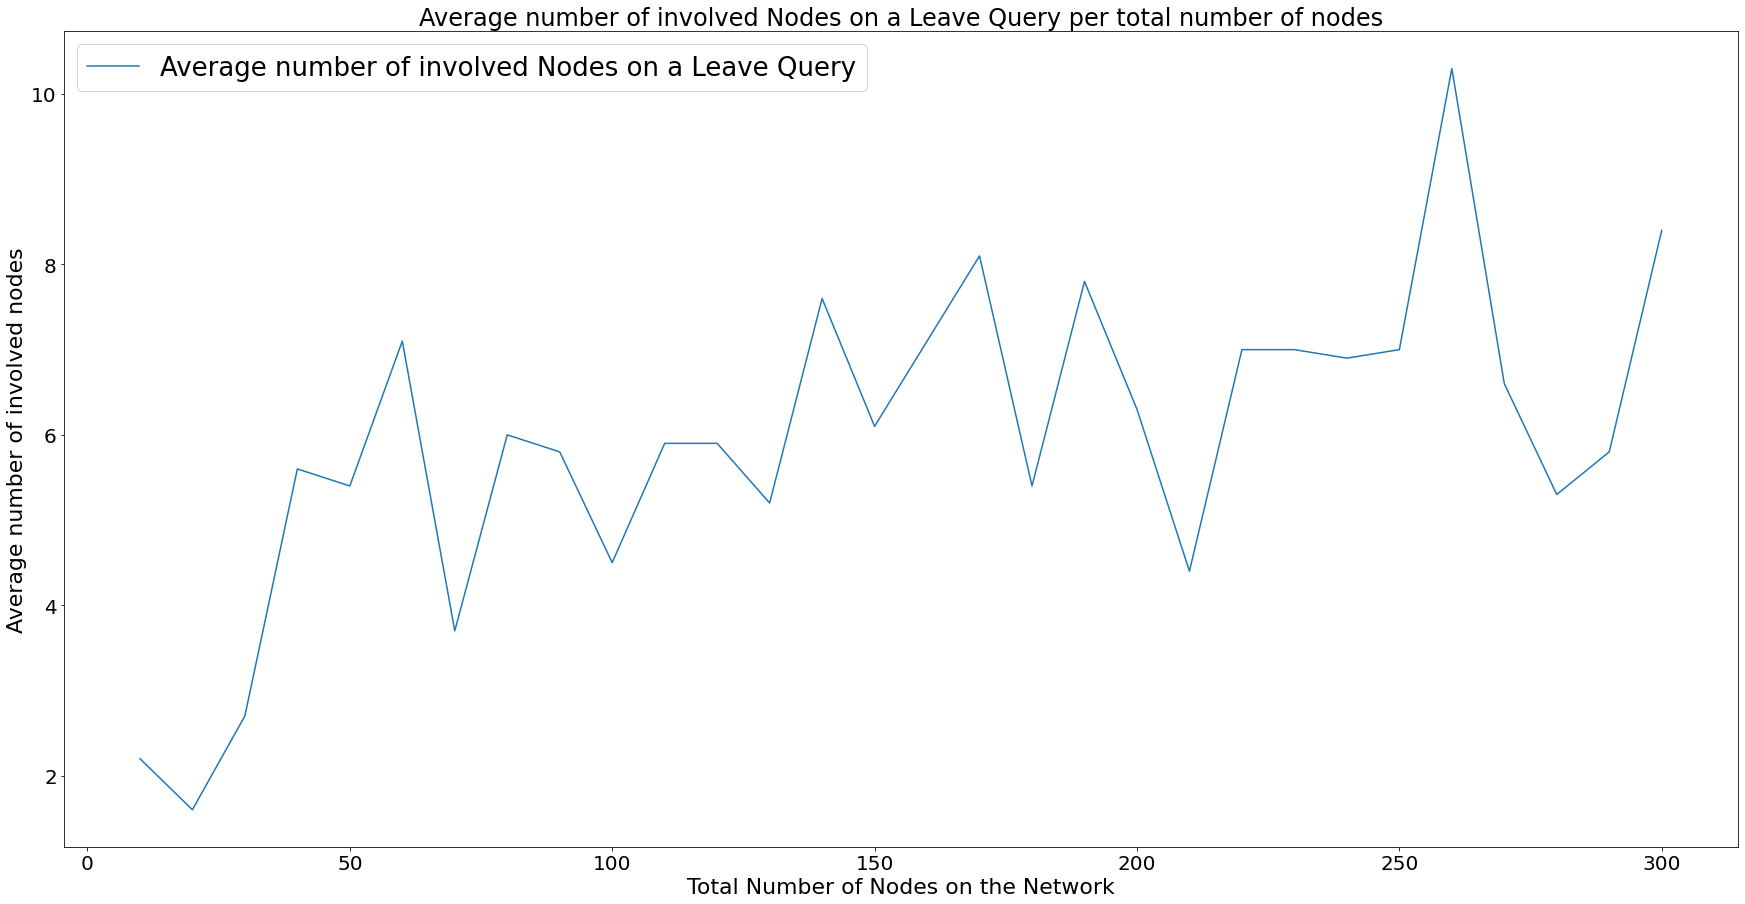

In [25]:
# Show the plot/plots
plt.plot(
    results_df["Nodes"], 
    results_df["Avg_Num_of_Involved_Nodes"], 
    label="Average number of involved Nodes on a Leave Query"
)
plt.ylabel("Average number of involved nodes", fontsize=22)
plt.xlabel("Total Number of Nodes on the Network", fontsize=22)
plt.title("Average number of involved Nodes on a Leave Query per total number of nodes", fontsize=24)
plt.legend(prop={'size': 26})
plt.show()

#### Simulation #4: Energy Efficiency and total energy consumption (Node Lookup Operation)

In [26]:
print("\nExperiment: Measuring the number of nodes involved for a node lookup query\n")


Experiment: Measuring the number of nodes involved for a node lookup query


In [27]:
total_runs_per_experiment = int(input("Please Specify the total runs per experiment: "))
print("Total runs per experiment: ", total_runs_per_experiment)
minimum_nodes = int(input("Please Specify the minimum num of nodes on the network: "))
print("Minimum nodes on a sensor network: ", minimum_nodes)
maximum_nodes = int(input("Please Specify the maximum num of nodes on the network: "))
print("Maximum nodes on a sensor network: ", maximum_nodes)
step = int(input("Please specify the total nodes increment step: "))
print("Increment step: ", step)

Total runs per experiment:  10
Minimum nodes on a sensor network:  10
Maximum nodes on a sensor network:  1010
Increment step:  10


In [28]:
# Main Simulation for Lookup Operation Energy Efficiency
results = []  # list to store the results
for total_nodes in range(minimum_nodes, maximum_nodes, step):
    print("\nRunning Experiment with total nodes: ", total_nodes)
    
    # Create a random WSN with random sensor node MAC Addresses
    wsn = create_random_wsn(total_nodes)
    
    # Export the network's list of nodes
    list_of_nodes = wsn.List_of_Nodes
    
    # Pick a random node to sign-in and then perform the simulation experiment
    active_node = random.choice(list_of_nodes)
    """
    print(
        "\nYou are connected to the Node with MAC: ",
        current_node.node_name, " and ID: ",
        current_node.node_id, "\n"
    )
    """
    
    # Perform the simulation experiment
    sum_of_involved_nodes = 1  # the sum of nodes involved for a query to be resolved (start with one to count the initial node)
    for i in range(0, total_runs_per_experiment):
        selected_node = random.choice(list_of_nodes) # select a random node of the network to look up
        while selected_node == active_node:  # select a node other than the current
            selected_node = random.choice(list_of_nodes)
        lookup_value = selected_node.node_name
        q = Query("lookup") # query instance
        lookup_node = active_node.lookup_query(lookup_value, q) # perform lookup query
        sum_of_involved_nodes = sum_of_involved_nodes + q.query_hops
        
    # Calculate the local average result
    local_average = sum_of_involved_nodes / total_runs_per_experiment
    local_result = {
        "Nodes": total_nodes, 
        "Avg_Num_of_Involved_Nodes": local_average
    }
    results.append(local_result)


Running Experiment with total nodes:  10

Running Experiment with total nodes:  20

Running Experiment with total nodes:  30

Running Experiment with total nodes:  40

Running Experiment with total nodes:  50

Running Experiment with total nodes:  60

Running Experiment with total nodes:  70

Running Experiment with total nodes:  80

Running Experiment with total nodes:  90

Running Experiment with total nodes:  100

Running Experiment with total nodes:  110

Running Experiment with total nodes:  120

Running Experiment with total nodes:  130

Running Experiment with total nodes:  140

Running Experiment with total nodes:  150

Running Experiment with total nodes:  160

Running Experiment with total nodes:  170

Running Experiment with total nodes:  180

Running Experiment with total nodes:  190

Running Experiment with total nodes:  200

Running Experiment with total nodes:  210

Running Experiment with total nodes:  220

Running Experiment with total nodes:  230

Running Experiment 

In [29]:
results

[{'Nodes': 10, 'Avg_Num_of_Involved_Nodes': 2.5},
 {'Nodes': 20, 'Avg_Num_of_Involved_Nodes': 3.1},
 {'Nodes': 30, 'Avg_Num_of_Involved_Nodes': 3.8},
 {'Nodes': 40, 'Avg_Num_of_Involved_Nodes': 3.5},
 {'Nodes': 50, 'Avg_Num_of_Involved_Nodes': 3.7},
 {'Nodes': 60, 'Avg_Num_of_Involved_Nodes': 4.3},
 {'Nodes': 70, 'Avg_Num_of_Involved_Nodes': 5.4},
 {'Nodes': 80, 'Avg_Num_of_Involved_Nodes': 3.6},
 {'Nodes': 90, 'Avg_Num_of_Involved_Nodes': 4.0},
 {'Nodes': 100, 'Avg_Num_of_Involved_Nodes': 4.1},
 {'Nodes': 110, 'Avg_Num_of_Involved_Nodes': 4.1},
 {'Nodes': 120, 'Avg_Num_of_Involved_Nodes': 4.2},
 {'Nodes': 130, 'Avg_Num_of_Involved_Nodes': 4.8},
 {'Nodes': 140, 'Avg_Num_of_Involved_Nodes': 4.5},
 {'Nodes': 150, 'Avg_Num_of_Involved_Nodes': 4.8},
 {'Nodes': 160, 'Avg_Num_of_Involved_Nodes': 5.0},
 {'Nodes': 170, 'Avg_Num_of_Involved_Nodes': 4.3},
 {'Nodes': 180, 'Avg_Num_of_Involved_Nodes': 4.3},
 {'Nodes': 190, 'Avg_Num_of_Involved_Nodes': 4.6},
 {'Nodes': 200, 'Avg_Num_of_Involved_Nod

In [30]:
# Convert results array of dicts to Pandas DataFrame
results_df = pd.DataFrame(results)
results_df

,Nodes,Avg_Num_of_Involved_Nodes
0,10,2.5
1,20,3.1
2,30,3.8
3,40,3.5
4,50,3.7
...,...,...
95,960,6.3
96,970,5.7
97,980,5.0
98,990,5.4


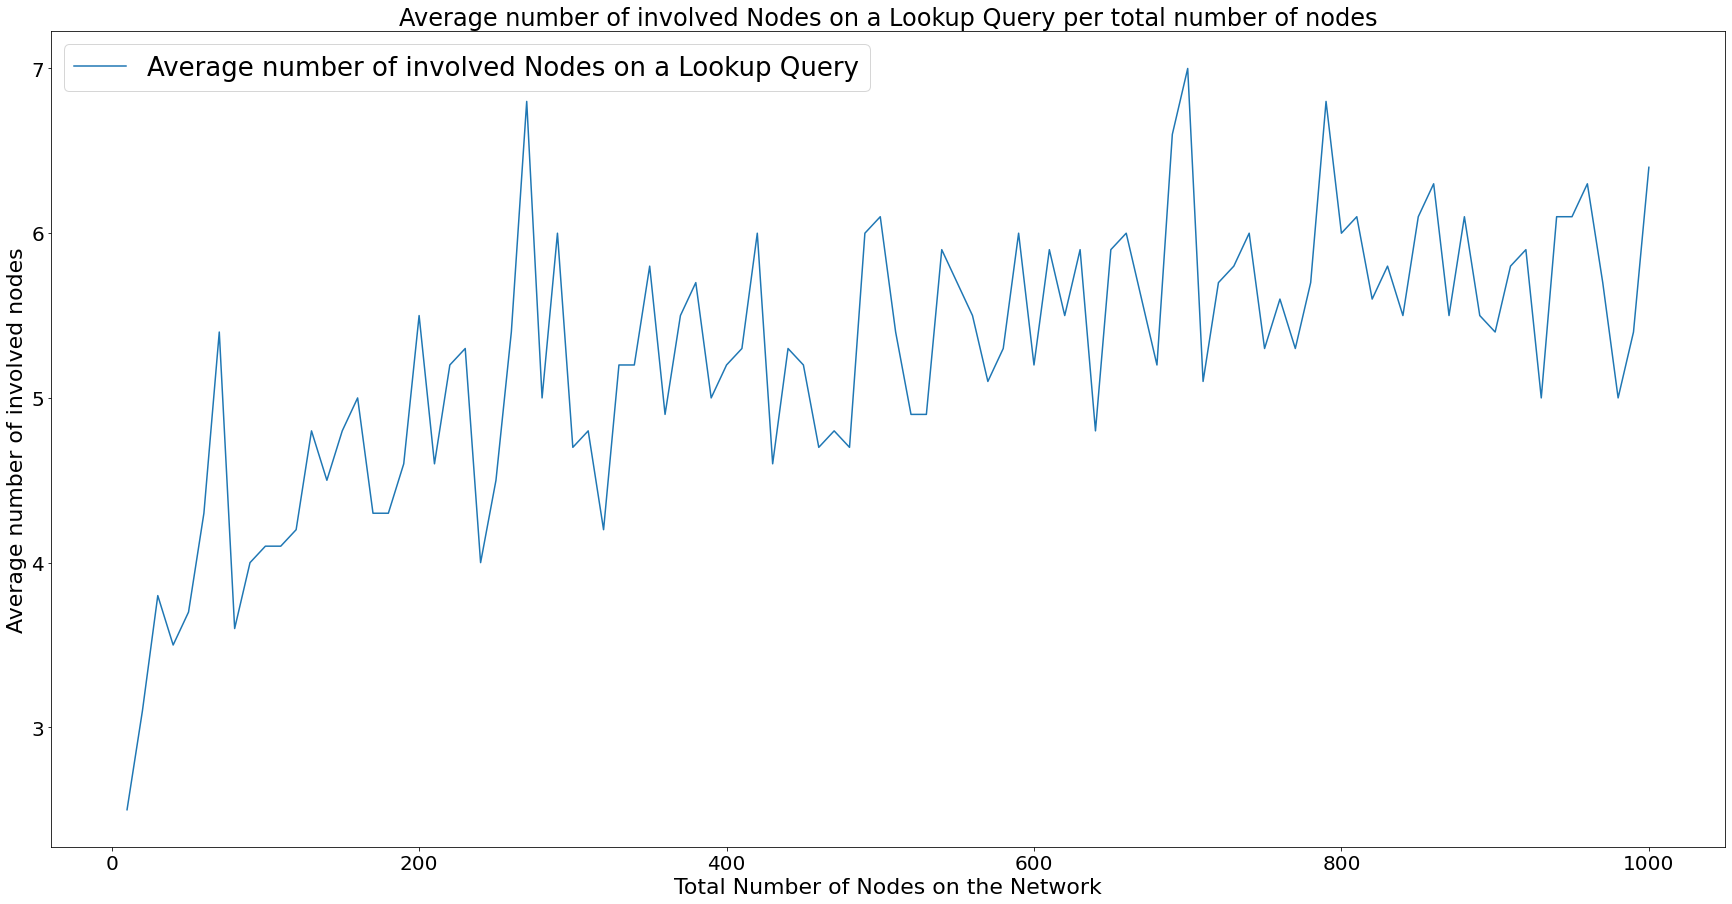

In [31]:
# Show the plot/plots
plt.plot(
    results_df["Nodes"], 
    results_df["Avg_Num_of_Involved_Nodes"], 
    label="Average number of involved Nodes on a Lookup Query"
)
plt.ylabel("Average number of involved nodes", fontsize=22)
plt.xlabel("Total Number of Nodes on the Network", fontsize=22)
plt.title("Average number of involved Nodes on a Lookup Query per total number of nodes", fontsize=24)
plt.legend(prop={'size': 26})
plt.show()